# Homework #3 (due 2nd of July, 11:59 PM):

### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes).
- Use box plots to look at the data. 
- Create a training and test set (with shuffling).
- Train a decision tree classifier using the training set.
- What are the top 5 most important (discriminative) features?
- Train a logistic regression model using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


In [2]:
data = datasets.load_breast_cancer()

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
breast_cancer_df = shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)
breast_cancer_df.head()
# shuffled the dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208,1.0
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790,0.0
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584,1.0
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938,0.0
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165,0.0


<AxesSubplot:xlabel='worst concave points', ylabel='worst concavity'>

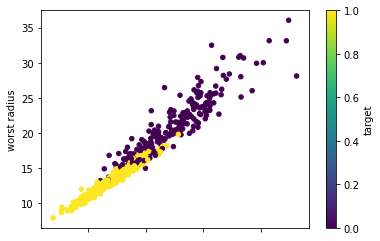

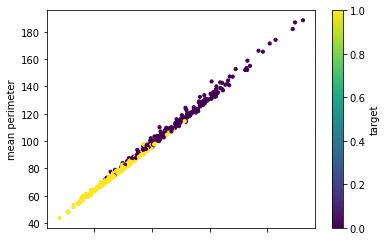

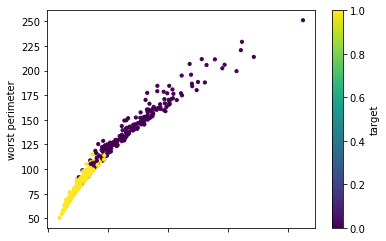

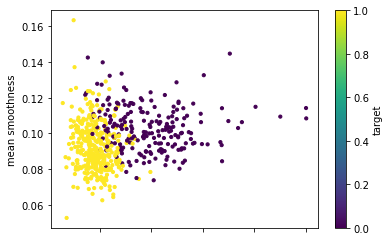

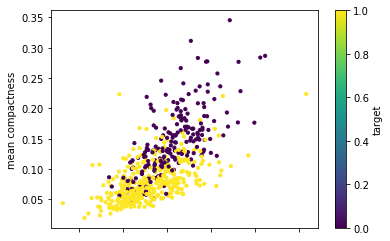

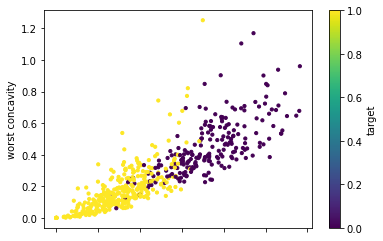

In [5]:
breast_cancer_df.plot.scatter(x='mean radius',y='worst radius',s=20,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='mean radius',y='mean perimeter',s=10,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='worst area',y='worst perimeter',s=10,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='mean area',y='mean smoothness',s=10,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='mean smoothness',y='mean compactness',s=10,c='target',colormap='viridis')
breast_cancer_df.plot.scatter(x='worst concave points',y='worst concavity',s=10,c='target',colormap='viridis')


* As we know that the cancer are of two classes malignant-0 and benign-1.
* In the scatter plot I tried to analyze various plots that shows increasing chances of the cancer being malignant.
* From the scatter plot we can observe that there is an increasing chance of cancer being malignant when there is increase in the specified X and Y features. 
* We can also observer that there is linear relationship between those features. i.e with the increase in features there will be increase in the cancer( cancer being malignant).

<AxesSubplot:xlabel='target', ylabel='mean area'>

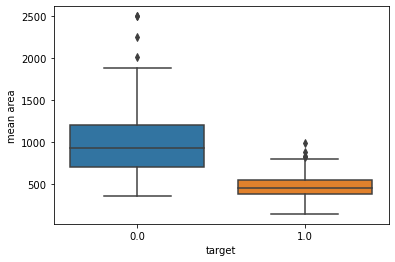

In [6]:
import seaborn as sns
sns.boxplot(x='target', y='mean area', data=breast_cancer_df)
# From this box plot we can say that Malignant tumors tend to have a higher mean area compared to benign.

<AxesSubplot:xlabel='target', ylabel='mean fractal dimension'>

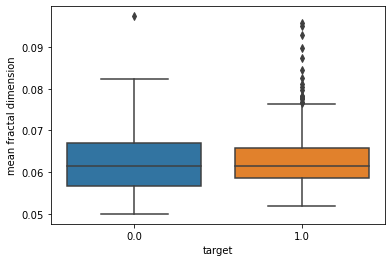

In [7]:
sns.boxplot(x='target', y='mean fractal dimension', data=breast_cancer_df)
# From this box plot we can say that both Malignant and benign have same mean fractal dimensions.

<AxesSubplot:>

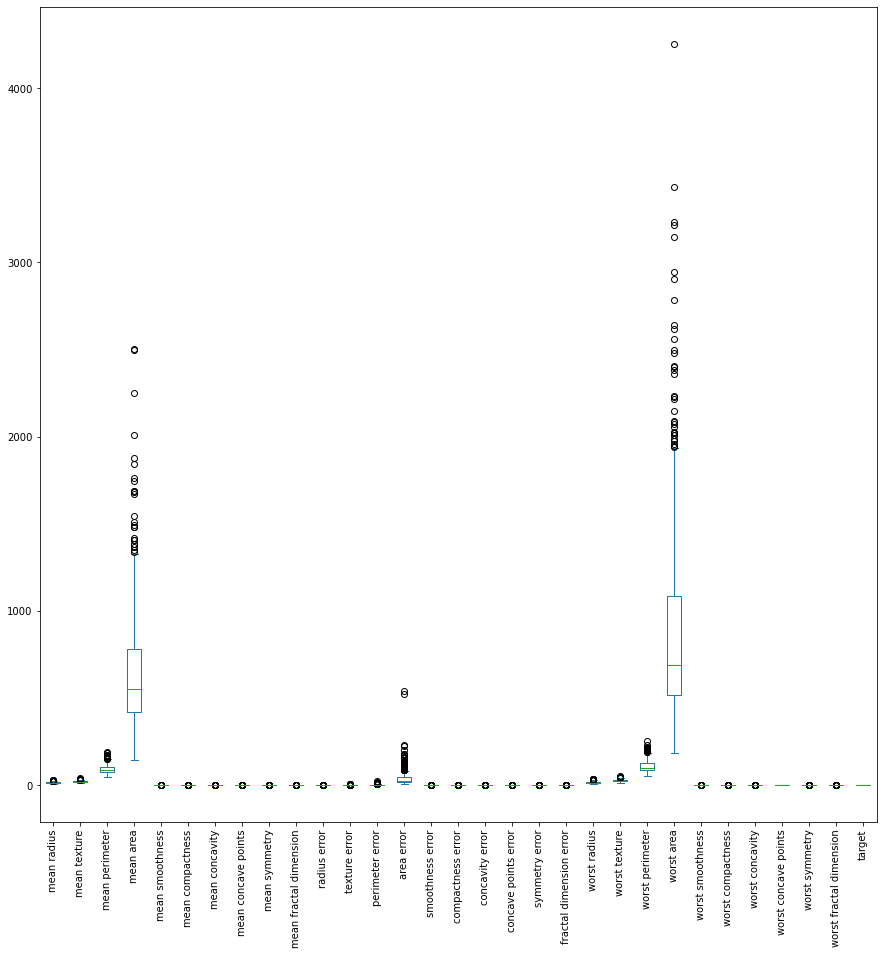

In [8]:
breast_cancer_df.plot.box(rot=90,figsize=(15,15))

In [9]:
train_df, test_df= train_test_split(breast_cancer_df)  # Here the default for shuffle is True and the data is also shuffled at first


In [10]:
tree = DecisionTreeClassifier()
tree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier()

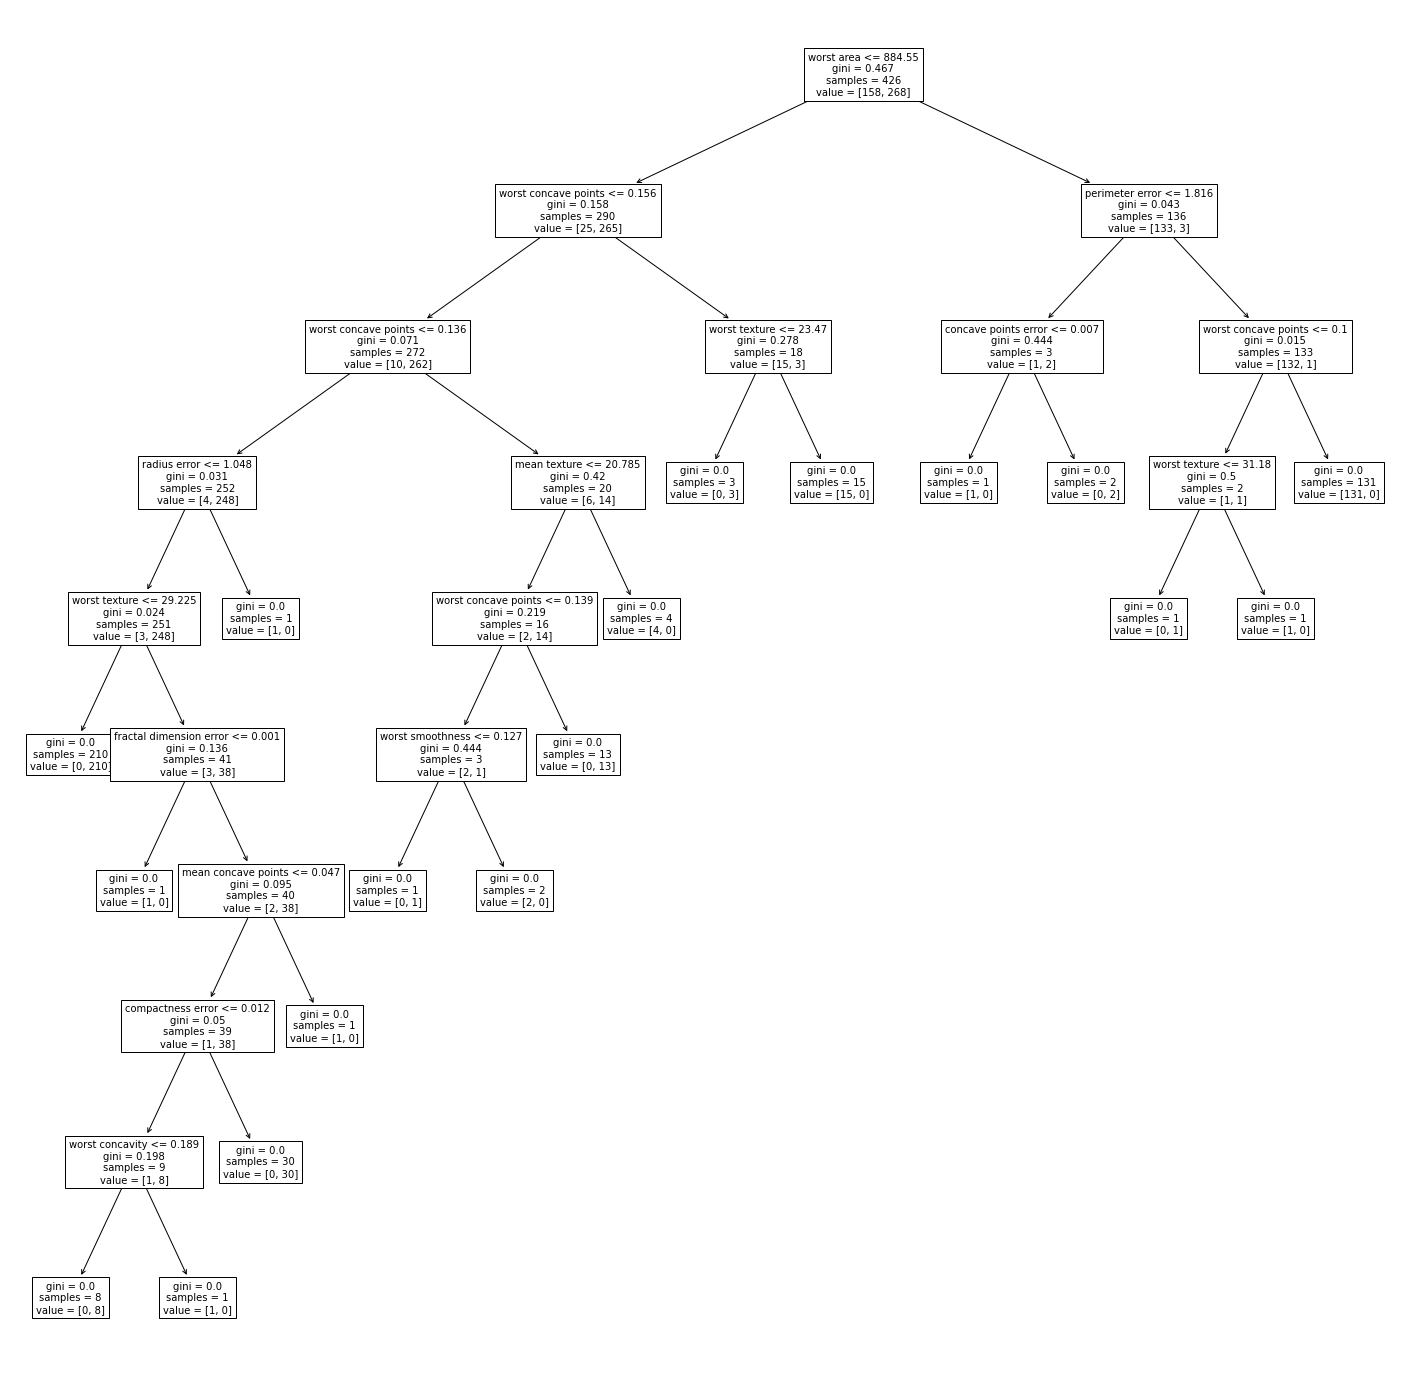

In [11]:
from sklearn import tree as tr
pyplot.figure(figsize=(25,25))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [12]:
tree.score(test_df.drop('target',axis=1), test_df['target'])

0.951048951048951

In [13]:
tree.feature_importances_
#The feature importances (in the given order). 
#The higher, the more important the feature.
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
# So from the output we can consider the higher computed features as the top 5 features 

array([0.        , 0.02464812, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00931237, 0.        , 0.        ,
       0.00978243, 0.        , 0.01282382, 0.        , 0.        ,
       0.00085987, 0.        , 0.00670697, 0.        , 0.00885811,
       0.        , 0.03202903, 0.        , 0.74065498, 0.00670697,
       0.        , 0.00894263, 0.13867469, 0.        , 0.        ])

In [14]:
x=breast_cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']]
y=breast_cancer_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [15]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
lr.score(x_test, y_test)

0.9361702127659575

After performing the logistic regression and decision trees classification on the dataset, the score for DT(0.951048951048951) is greater than LR(0.9361702127659575). If we go theoritically DT performance is better when there are categorical classes to classify. As there are two classes of malignant and benign in the dataset, classifying the data with decision trees would show higher performance than the logistic regression.

### Part 2)

- Use the provided *winequality_white.csv* as your data. Last column (quality) is the target variable.
- Do not forget to shuffle and split (Train/test) your data.
- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.


In [17]:
wines_df = shuffle(pd.read_csv('winequality_white.csv', sep=";")) 
wines_df.shape
# Read the dataset by shuffling

(4898, 12)

In [18]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2817,6.7,0.19,0.39,1.0,0.032,14.0,71.0,0.98912,3.31,0.38,13.0,7
3766,6.9,0.40,0.17,12.9,0.033,59.0,186.0,0.99754,3.08,0.49,9.4,5
2458,7.8,0.32,0.33,10.4,0.031,47.0,194.0,0.99692,3.07,0.58,9.6,6
3695,6.4,0.15,0.40,1.3,0.053,61.0,146.0,0.99112,3.17,0.68,11.0,6
2511,6.2,0.30,0.49,11.2,0.058,68.0,215.0,0.99656,3.19,0.60,9.4,6


In [19]:
wines_train_df, wines_test_df = train_test_split(wines_df)
# # Here the default for shuffle is True and the data is also shuffled at first

In [20]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=10)
tree_reg.fit(wines_train_df.drop('quality',axis=1),wines_train_df['quality'])

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

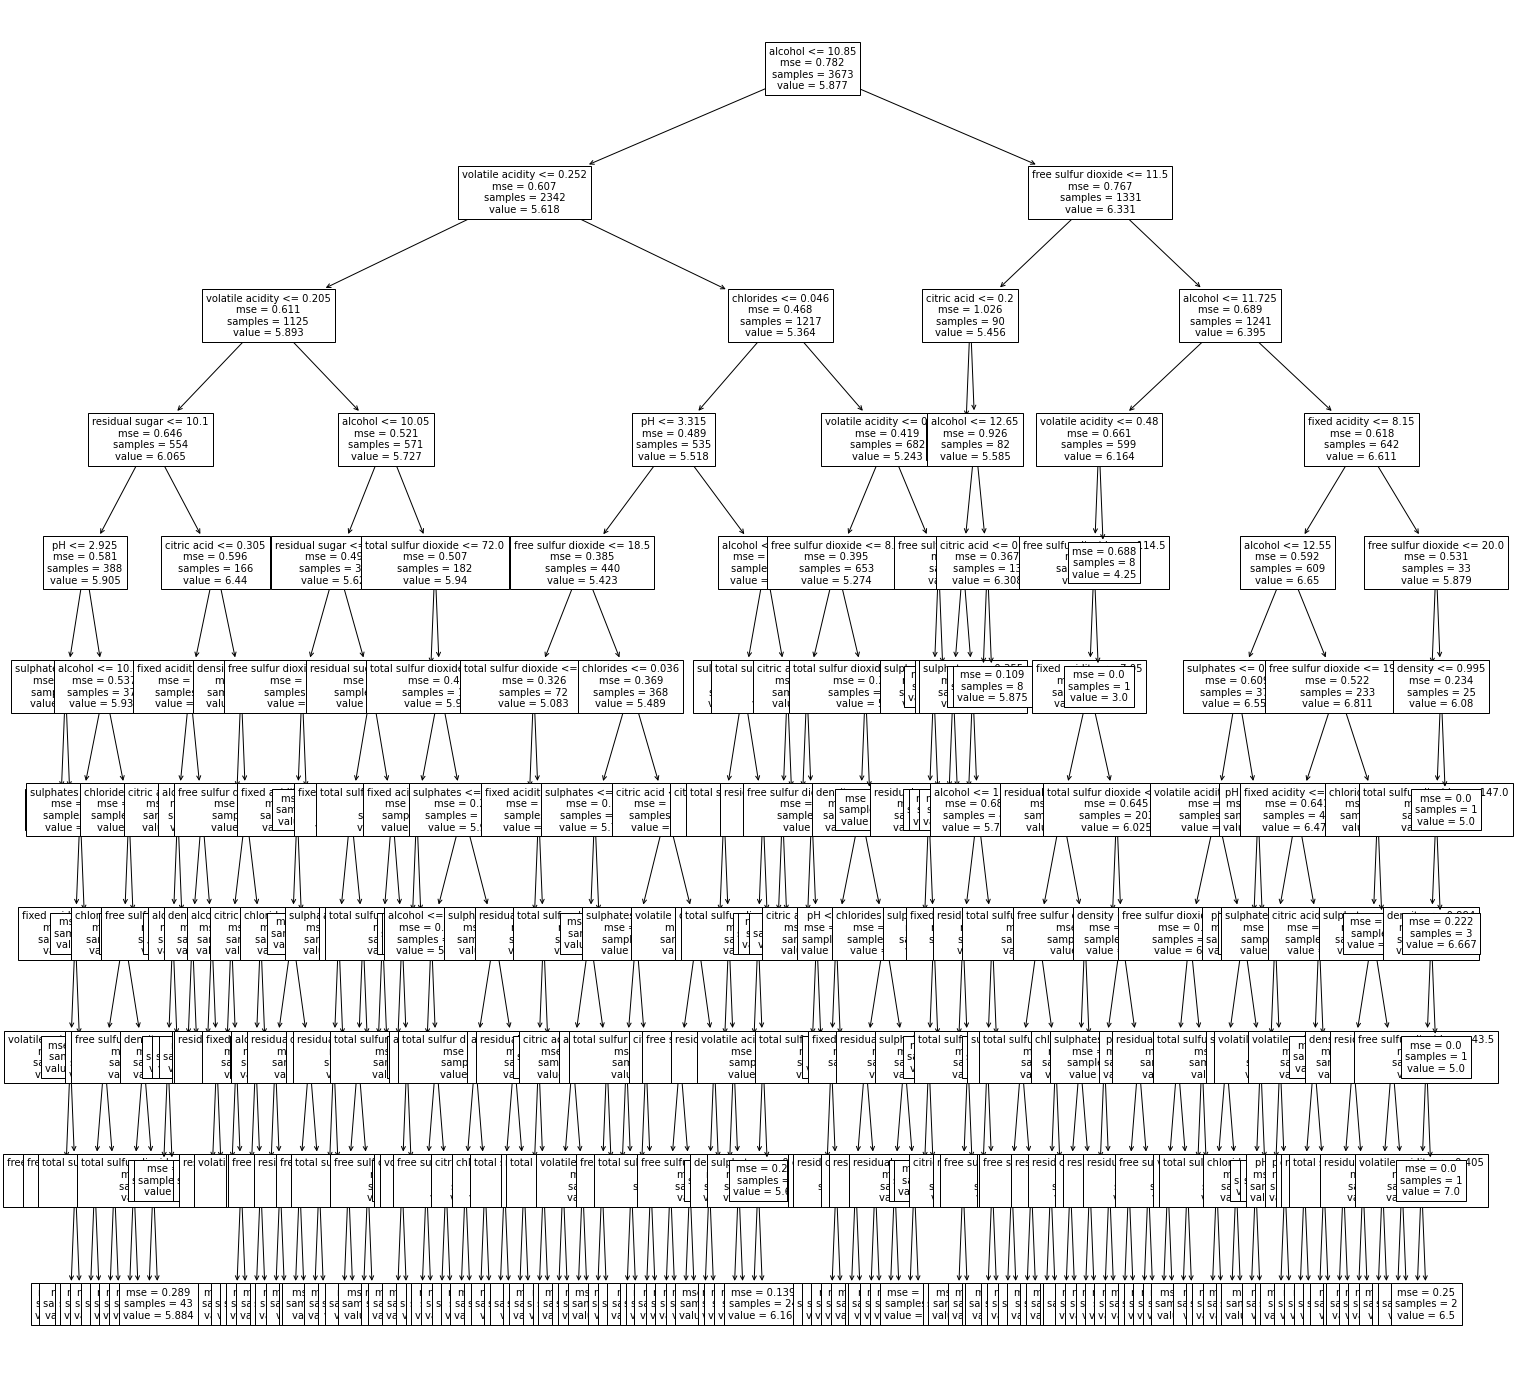

In [21]:
from sklearn import tree as tr
pyplot.figure(figsize=(25,25))
tr.plot_tree(tree_reg, feature_names=list(wines_df.columns), fontsize=10)
pyplot.show()

In [22]:
mean_squared_error(tree_reg.predict(wines_test_df.drop('quality',axis=1)), wines_test_df['quality'])

0.5504203822277839

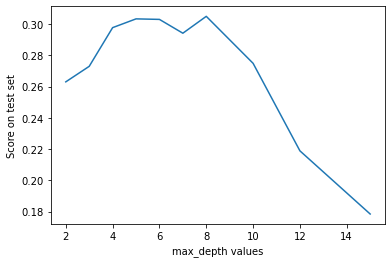

In [23]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
errors = np.zeros(10)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(wines_train_df.drop('quality',axis=1),wines_train_df['quality'])
    #u=mean_squared_error(tree_reg.predict(wines_test_df.drop('target',axis=1)), wines_test_df['target'])
    u=tree_reg.score(wines_test_df.drop('quality',axis=1), wines_test_df['quality'])
    errors[index]=u
    index+=1

x = np.array(range(0,10))
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

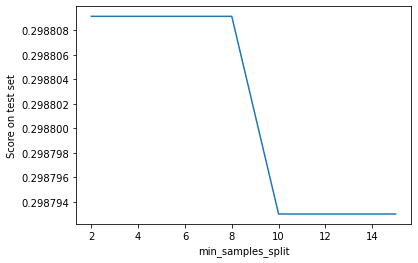

In [24]:
msplits = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
errors = np.zeros(10)
index=0

for d in msplits:
    tree_reg = DecisionTreeRegressor(max_depth=4, min_samples_split=d)
    tree_reg.fit(wines_train_df.drop('quality',axis=1),wines_train_df['quality'])
    #u=mean_squared_error(tree_reg.predict(wines_test_df.drop('target',axis=1)), wines_test_df['target'])
    u=tree_reg.score(wines_test_df.drop('quality',axis=1), wines_test_df['quality'])
    errors[index]=u
    index+=1

x = np.array(range(0,10))
pyplot.plot(msplits, errors)
pyplot.xlabel('min_samples_split')
pyplot.ylabel('Score on test set')
pyplot.show()

In [28]:
tree_reg = DecisionTreeRegressor(max_depth=8, min_samples_split=8)
tree_reg.fit(wines_test_df.drop('quality',axis=1),wines_test_df['quality'])

DecisionTreeRegressor(max_depth=8, min_samples_split=8)

In [29]:
mean_squared_error(tree_reg.predict(wines_test_df.drop('quality',axis=1)), wines_test_df['quality'])

0.3153334674046743

* Considered the max_depth as 10, min_samples_split as 10 for the first decision tree classification.
* For the second decision tree classification considered the better max_depth and min_samples_split parameter 
* Mean squared error before considering the best parameters is 0.5504203822277839 and after considering the best parameters is 0.3153334674046743
* After considering the better parameters the mean squared error got reduced for the decision tree.
* The lower mean squared error, the better the decision tree classification performance will be.